In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw


In [ ]:
#Канцерогенность — это способность веществ или факторов вызывать или повышать вероятность развития рака
df = pd.read_csv('../datasets/toxric_30_datasets/Carcinogenicity_Carcinogenicity.csv')


In [43]:
def is_valid_smiles(smiles):
    """Проверяет, можно ли построить молекулу из SMILES"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

df["is_valid"] = df["Canonical SMILES"].apply(is_valid_smiles)

total = len(df)
valid = df["is_valid"].sum()
invalid = total - valid

print(f"Корректных молекул: {valid}")
print(f"Некорректных молекул: {invalid}")
print(f"Доля невалидных: {invalid / total:.2%}")


Корректных молекул: 1009
Некорректных молекул: 12
Доля невалидных: 1.18%


SMILES — строка химической структуры
Toxicity Value  — целевая переменная (0 — нетоксично, 1 — токсично)

In [ ]:
print(f"Размерность: {df.shape}")
print(df.info())
print(df.head(10))

Размерность: (1021, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TAID              1021 non-null   object 
 1   Name              541 non-null    object 
 2   IUPAC Name        1002 non-null   object 
 3   PubChem CID       1002 non-null   float64
 4   Canonical SMILES  1009 non-null   object 
 5   InChIKey          1001 non-null   object 
 6   Toxicity Value    1021 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 56.0+ KB
None


In [ ]:
# ПРОПУСКИ
missing_count = df.isna().sum()
print(missing_count)
missing_percent = (100 * missing_count / len(df))
print(missing_percent)


TAID                  0
Name                480
IUPAC Name           19
PubChem CID          19
Canonical SMILES     12
InChIKey             20
Toxicity Value        0
dtype: int64
TAID                 0.000000
Name                47.012733
IUPAC Name           1.860921
PubChem CID          1.860921
Canonical SMILES     1.175318
InChIKey             1.958864
Toxicity Value       0.000000
dtype: float64


Процент токсичных в-в: 49.66%


<Axes: xlabel='Toxicity Value', ylabel='count'>

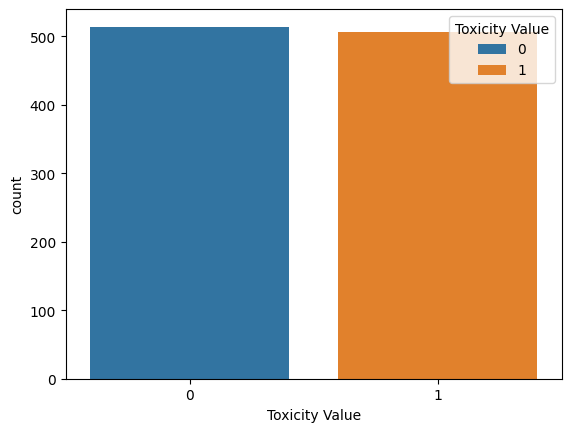

In [ ]:
# Распределение токсичности
print(f"Процент токсичных в-в: {df['Toxicity Value'].mean():.2%}")

sns.countplot(x='Toxicity Value', data=df, hue='Toxicity Value')